# Who leaves Zurich?
Since 1993 the population of Zurich grew by more than 60'000 people, or 17 percent. In the last four years a lot of people focus on the people coming in to the city. This is reasonable. Since 2005 there where always more people coming in then leaving and changing the city. But then, every year are people leaving the city. Who are those? As a lot of older buildings have been replaced by new ones in the last few years and there, I thought that maybe a lot of old people have to leave the city, because they cannot pay the rent in the new building anymore.

In [ ]:
import pandas as pd
import requests
import time 
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update(
    {'pdf.fonttype':42,
    'ps.fonttype': 42
})
import numpy
import re
plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv('bev352od3522.csv')
df.head()

,StichtagDatJahr,WegBezirkHistSort,WegBezirkHistLang,WegKtHistSort,WegKtHistLang,WegLandHistSort,WegLandHistLang,WegRegionSort,WegRegionLang,WegKontinentSort,WegKontinentLang,QuarSort,QuarLang,KreisSort,AlterV10Sort,AlterV10Kurz,SexKurz,Ziv2Sort,Ziv2Lang,AnzWezuWir
0,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,1,0-9,M,1,Ledig,2
1,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,3,20-29,M,1,Ledig,1
2,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,3,20-29,W,1,Ledig,1
3,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,4,30-39,M,2,Verheiratet,2
4,1993,101,Bezirk Affoltern,1,Zürich,8100,Schweiz,13,Zentraleuropa,1,Europa,11,Rathaus,1,4,30-39,W,2,Verheiratet,1


Get the sum of the ones who move out (within Switzerland) groubby Age

In [3]:
df_age = pd.DataFrame()
container = pd.DataFrame()

for year in list(set(df['StichtagDatJahr'])):
    container = pd.DataFrame(df[(df['StichtagDatJahr']==year) & (df['WegLandHistLang']=='Schweiz')].groupby(['AlterV10Kurz','StichtagDatJahr', 'SexKurz', 'Ziv2Lang'], as_index=False)['AnzWezuWir'].sum())
    df_age = pd.concat([df_age, container])

df_age.head()


,AlterV10Kurz,StichtagDatJahr,SexKurz,Ziv2Lang,AnzWezuWir
0,0-9,1993,M,Ledig,699
1,0-9,1993,W,Ledig,734
2,10-19,1993,M,Ledig,407
3,10-19,1993,M,Verheiratet,4
4,10-19,1993,W,Ledig,528


Write a function to calculate the percentage

In [4]:
def get_percentage(row):
    percentage = row['AnzWezuWir']/df[(df['StichtagDatJahr']==row['StichtagDatJahr']) & (df['WegLandHistLang']=='Schweiz')].AnzWezuWir.sum()*100
    return pd.Series({
        'percentage': percentage
        })

In [5]:
df_age['percentage'] = df_age.apply(get_percentage, axis=1)


In [6]:
df_percentage_all = df_age
df_age.head(11)

,AlterV10Kurz,StichtagDatJahr,SexKurz,Ziv2Lang,AnzWezuWir,percentage
0,0-9,1993,M,Ledig,699,3.607742
1,0-9,1993,W,Ledig,734,3.788387
2,10-19,1993,M,Ledig,407,2.100645
3,10-19,1993,M,Verheiratet,4,0.020645
4,10-19,1993,W,Ledig,528,2.725161
5,10-19,1993,W,Verheiratet,28,0.144516
6,20-29,1993,M,Geschieden,42,0.216774
7,20-29,1993,M,Ledig,3861,19.927742
8,20-29,1993,M,Verheiratet,700,3.612903
9,20-29,1993,M,Verwitwet,2,0.010323


Create new age-labels that suit my hypothesis

In [7]:
def get_agelabel(row):
    if row['AlterV10Kurz']=="0-9":
        return "0-19"
    if row['AlterV10Kurz']=="10-19":
        return "0-19"
    if row['AlterV10Kurz']=="20-29":
        return "20-29"
    if row['AlterV10Kurz']=="30-39":
        return "30-39"
    if row['AlterV10Kurz']=="40-49":
        return "40-49"
    if row['AlterV10Kurz']=="50-59":
        return "50-59"
    if row['AlterV10Kurz']=="60-69":
        return "60-69"
    if row['AlterV10Kurz']=="70-79":
        return "70+"
    if row['AlterV10Kurz']=="80-89":
        return "70+"    
    if row['AlterV10Kurz']=="90-99":
        return "70+"
    if row['AlterV10Kurz']=="100 u. älter":
        return "70+"
    else:
        return 'other'
    

In [8]:
#run the function. Attention it needs some time to calculate it.
df_percentage_all['age_label'] = df_percentage_all.apply(get_agelabel, axis=1)
df_age = df_percentage_all
df_age.head(5)

,AlterV10Kurz,StichtagDatJahr,SexKurz,Ziv2Lang,AnzWezuWir,percentage,age_label
0,0-9,1993,M,Ledig,699,3.607742,0-19
1,0-9,1993,W,Ledig,734,3.788387,0-19
2,10-19,1993,M,Ledig,407,2.100645,0-19
3,10-19,1993,M,Verheiratet,4,0.020645,0-19
4,10-19,1993,W,Ledig,528,2.725161,0-19


In [9]:
#calculate the sum of the percnetage by year and age
df_age = df_age.groupby(['StichtagDatJahr', 'age_label'], as_index=False).percentage.sum()
df_age.head()

,StichtagDatJahr,age_label,percentage
0,1993,0-19,12.387097
1,1993,20-29,46.632258
2,1993,30-39,23.623226
3,1993,40-49,8.278710
4,1993,50-59,4.356129


(0, 49.63225806451612)

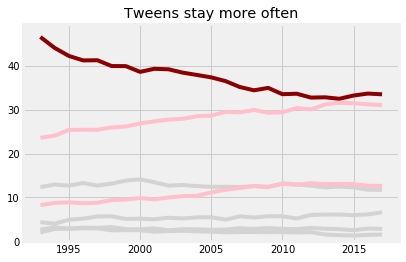

In [30]:
## Make a line plot

color_dict = {
    '0-19': 'gray',
    '20-29': 'pink',
    '30-39': 'orange',
    '40-49': 'blue',
    '50-59': 'green',
    '60-69': 'purple',
    '70+': 'cyan'
}
dot_colors = [color_dict[name] for name in df_age.age_label]

ax = df_age[df_age['age_label']=="0-19"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, title = "Tweens stay more often")
df_age[df_age['age_label']=="20-29"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='darkred', legend=False, ax=ax)
df_age[df_age['age_label']=="30-39"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_age[df_age['age_label']=="40-49"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_age[df_age['age_label']=="50-59"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_age[df_age['age_label']=="60-69"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_age[df_age['age_label']=="70+"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
ax.xaxis.label.set_visible(False)
ax.set_ylim(0, max(df_age.percentage)+3)



Is there a difference between the sexes?

In [16]:
#calculate the sum of the percnetage by year and age
df_sex = df_percentage_all
df_sex = df_sex.groupby(['StichtagDatJahr', 'age_label', 'SexKurz'], as_index=False).percentage.sum()
df_sex.head()


,StichtagDatJahr,age_label,SexKurz,percentage
0,1993,0-19,M,5.729032
14,1994,0-19,M,6.553581
28,1995,0-19,M,6.312646
42,1996,0-19,M,6.420435
56,1997,0-19,M,6.308331
70,1998,0-19,M,6.570076
84,1999,0-19,M,6.960448
98,2000,0-19,M,6.977173
112,2001,0-19,M,6.765328
126,2002,0-19,M,6.397439


(0, 49.63225806451612)

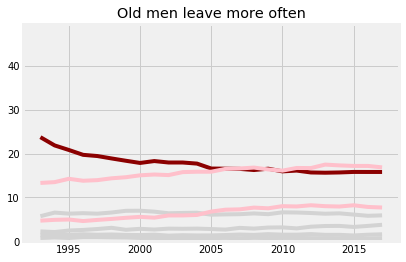

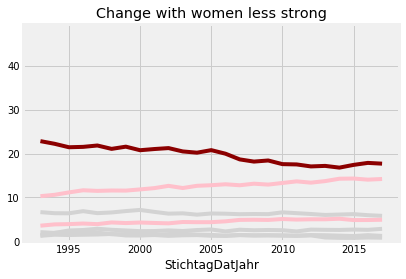

In [32]:
ax = df_sex[(df_sex['age_label']=="0-19") & (df_sex['SexKurz']=="M")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, title = "Old men leave more often")
df_sex[(df_sex['age_label']=="20-29") & (df_sex['SexKurz']=="M")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='darkred', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="30-39") & (df_sex['SexKurz']=="M")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="40-49") & (df_sex['SexKurz']=="M")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="50-59") & (df_sex['SexKurz']=="M")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="60-69") & (df_sex['SexKurz']=="M")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="70+") & (df_sex['SexKurz']=="M")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
ax.xaxis.label.set_visible(False)
ax.set_ylim(0, max(df_age.percentage)+3)
ax = df_sex[(df_sex['age_label']=="0-19") & (df_sex['SexKurz']=="W")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, title = "Change with women less strong")
df_sex[(df_sex['age_label']=="20-29") & (df_sex['SexKurz']=="W")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='darkred', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="30-39") & (df_sex['SexKurz']=="W")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="40-49") & (df_sex['SexKurz']=="W")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="50-59") & (df_sex['SexKurz']=="W")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="60-69") & (df_sex['SexKurz']=="W")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_sex[(df_sex['age_label']=="70+") & (df_sex['SexKurz']=="W")].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
ax.set_ylim(0, max(df_age.percentage)+3)


Is there a difference between marital status?

In [39]:
#calculate the sum of the percnetage by year
df_marital = df_percentage_all
df_marital = df_marital.groupby(['StichtagDatJahr', 'Ziv2Lang'], as_index=False).percentage.sum()
df_marital.head()
set(df_marital.Ziv2Lang)


{'Aufgelöste Partnerschaft',
 'Geschieden',
 'In eingetragener Partnerschaft',
 'Ledig',
 'Unbekannt',
 'Verheiratet',
 'Verwitwet'}

(0, 68.256092916984)

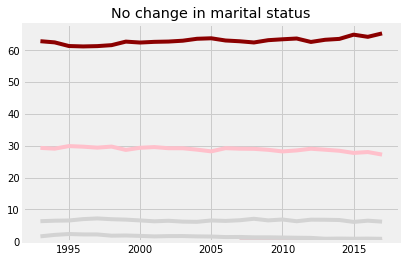

In [44]:
ax = df_marital[df_marital['Ziv2Lang']=="Aufgelöste Partnerschaft"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, title = "No change in marital status")
df_marital[df_marital['Ziv2Lang']=="Geschieden"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="In eingetragener Partnerschaft"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Ledig"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='darkred', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Aufgelöste Partnerschaft"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Unbekannt"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Verheiratet"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='pink', legend=False, ax=ax)
df_marital[df_marital['Ziv2Lang']=="Verwitwet"].plot(kind = 'line', x='StichtagDatJahr', y='percentage',  linestyle='-', color='lightgrey', legend=False, ax=ax)
ax.xaxis.label.set_visible(False)
ax.set_ylim(0, max(df_marital.percentage)+3)